In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,Input

In [4]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(45000, 32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)
(45000, 1)
(5000, 1)
(10000, 1)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range = 0.1,
        horizontal_flip=True,
        vertical_flip=False
        )
train_datagen.fit(X_train)

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),


    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [10]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=0.00001
)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:

history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[learning_rate_reduction]
)

Epoch 1/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2372 - accuracy: 0.5658 - val_loss: 1.2069 - val_accuracy: 0.5786 - lr: 0.0010
Epoch 2/50
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0296 - accuracy: 0.6456 - val_loss: 1.0671 - val_accuracy: 0.6326 - lr: 0.0010
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9097 - accuracy: 0.6891 - val_loss: 1.0828 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8303 - accuracy: 0.7150 - val_loss: 1.1826 - val_accuracy: 0.6388 - lr: 0.0010
Epoch 5/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7736 - accuracy: 0.7373 - val_loss: 0.8369 - val_accuracy: 0.7214 - lr: 0.0010
Epoch 6/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7238 - accuracy: 0.7536 - val_loss: 0.8818 - val_accuracy: 0.7072 - lr: 0.0010
Epoch 7/50
1407/1407 [==============================] -

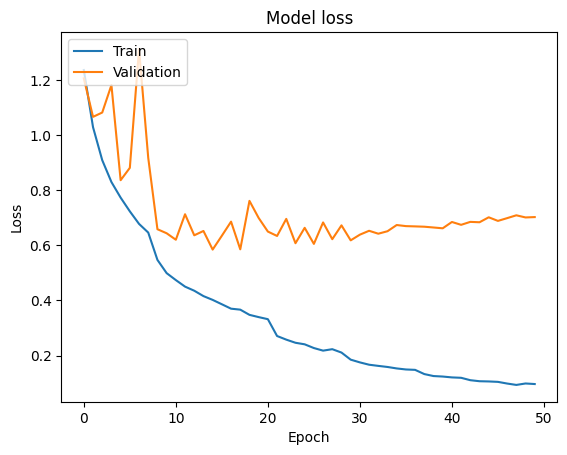

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

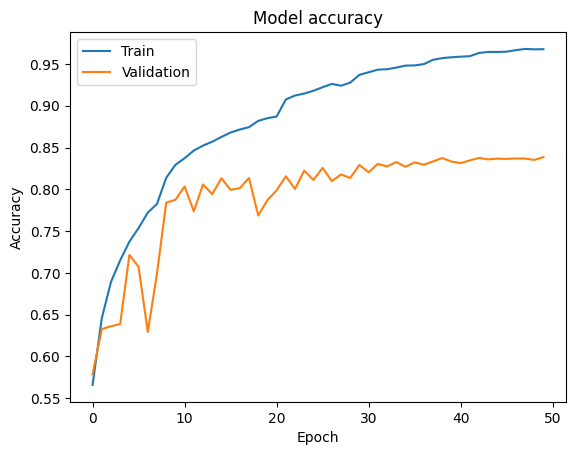

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.7447 - accuracy: 0.8289
Test Loss: 0.7447341084480286
Test Accuracy: 0.8288999795913696
